# tNR Experiment 11



In [2]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/TrON'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots

In [3]:
# Data analysis directory
project_dir = '/SNS/REF_L/IPTS-34347/shared/tNR/'
data_dir = os.path.join(project_dir, 'expt11-tNR-218389-120s')

# Directory where we store dynamic fit results
dyn_model_dir = os.path.join(project_dir, 'dyn-fitting')

dynamic_run = 218389 # Cycle 1


dyn_fit_dir = os.path.join(project_dir, 'dyn-fitting', '218389-dyn/results-120s')



/SNS/REF_L/IPTS-34347/shared/tNR/expt11-tNR-218389-120s
55
Ref r218389_t000000.txt
Skipped: 0


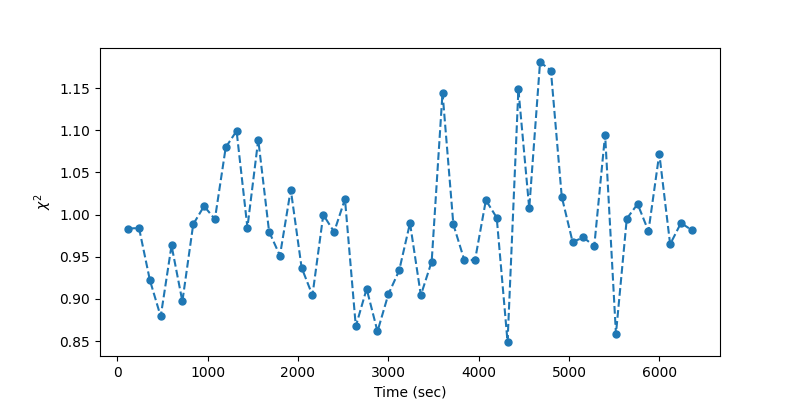

In [61]:
importlib.reload(summary_plots)
print(data_dir)

run_number = 218389
chi2 = summary_plots.detect_changes(run_number, data_dir, first=0, last=-1, out_array=None)

In [62]:
from tron.bayesian_analysis import template, fitting_loop
importlib.reload(template)
importlib.reload(fitting_loop)

init_json = os.path.join(os.path.expanduser('~/git'), 'experiments-2025', 'jen-apr2025', 'results', 'expt11-all-corefine', 'Cu-THF-corefine-expt11-1-expt.json') 

template_str = template.create_model(init_json, "sample")

with open('model-loop-tmp.py', 'w') as fd:
    fd.write(template_str)

results_dir = os.path.join(project_dir, 'test')

## Summary of steady state data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Could not find /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/207161/__model-profile.dat
Could not find /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/207169/__model-profile.dat


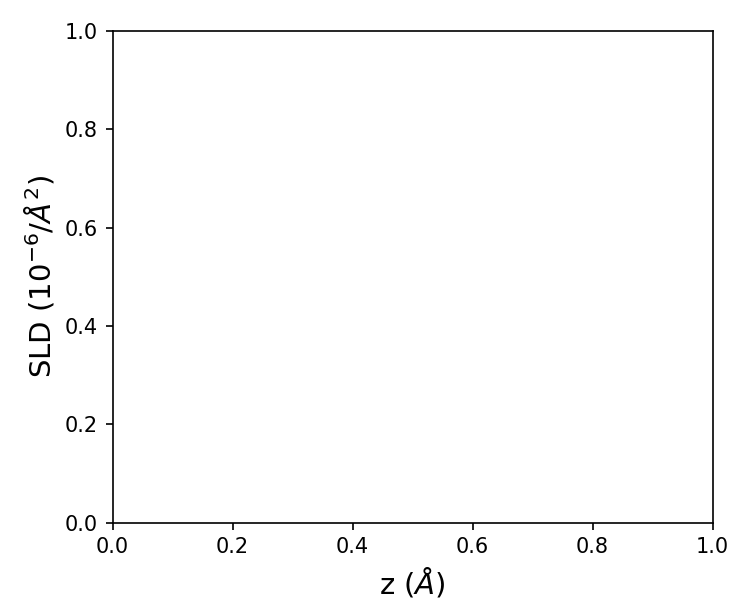

In [29]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

init_r = os.path.join(dyn_model_dir, "207161", "__model-profile.dat")
final_r = os.path.join(dyn_model_dir, "207169", "__model-profile.dat")
summary_plots.plot_sld(init_r, "207161: Pre cycle 1", show_cl=False)
summary_plots.plot_sld(final_r, "207169: Post cycle 1", show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


55


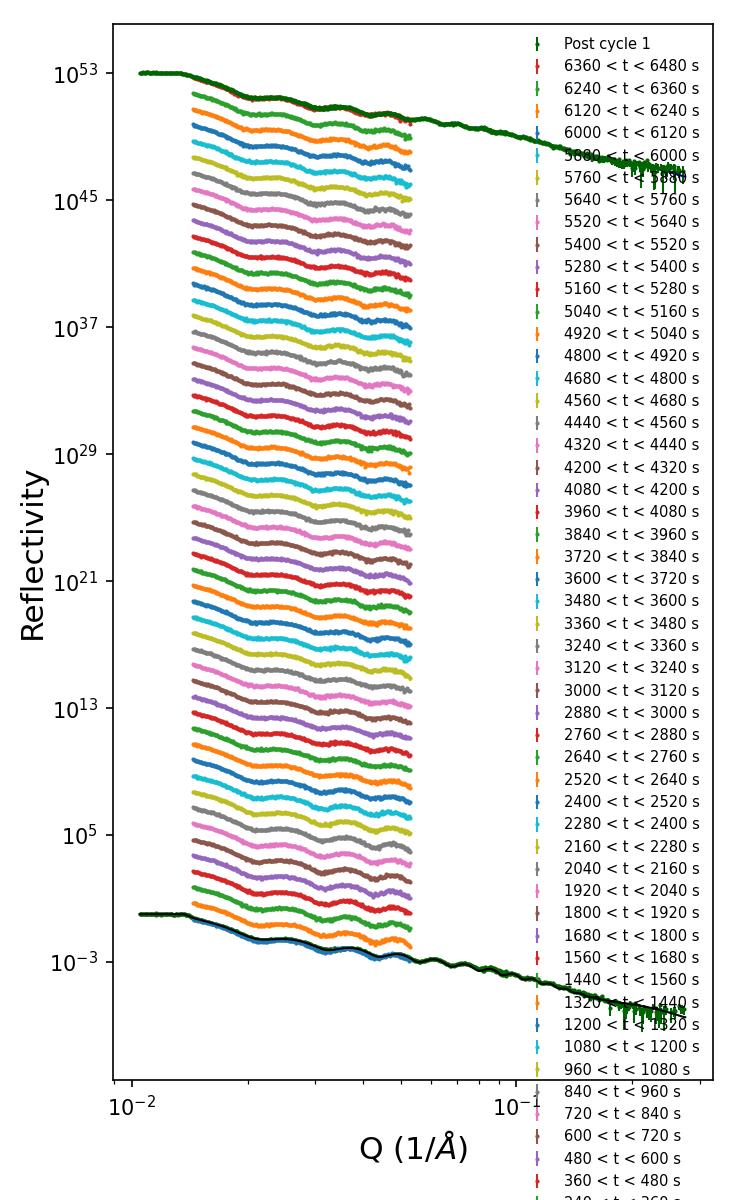

In [5]:
importlib.reload(summary_plots)

steady_state_fit_dir = "/SNS/users/m2d/git/experiments-2025/jen-apr2025/results/expt11-all-corefine"

init_state = os.path.join(steady_state_fit_dir, 'Cu-THF-corefine-expt11-1-refl.dat')
final_state = os.path.join(steady_state_fit_dir, 'Cu-THF-corefine-expt11-2-refl.dat')

file_list = summary_plots.plot_dyn_data(dynamic_run, init_state, final_state, first_index=0, last_index=-1, model_name='model-loop-207168',
                                        dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir)

Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t006360/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t006240/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t006120/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t006000/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t005880/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t005760/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/r218389_t005640/model-loop-218389-1-profile.dat
Could not find file /SNS/REF_L/IPTS-34347

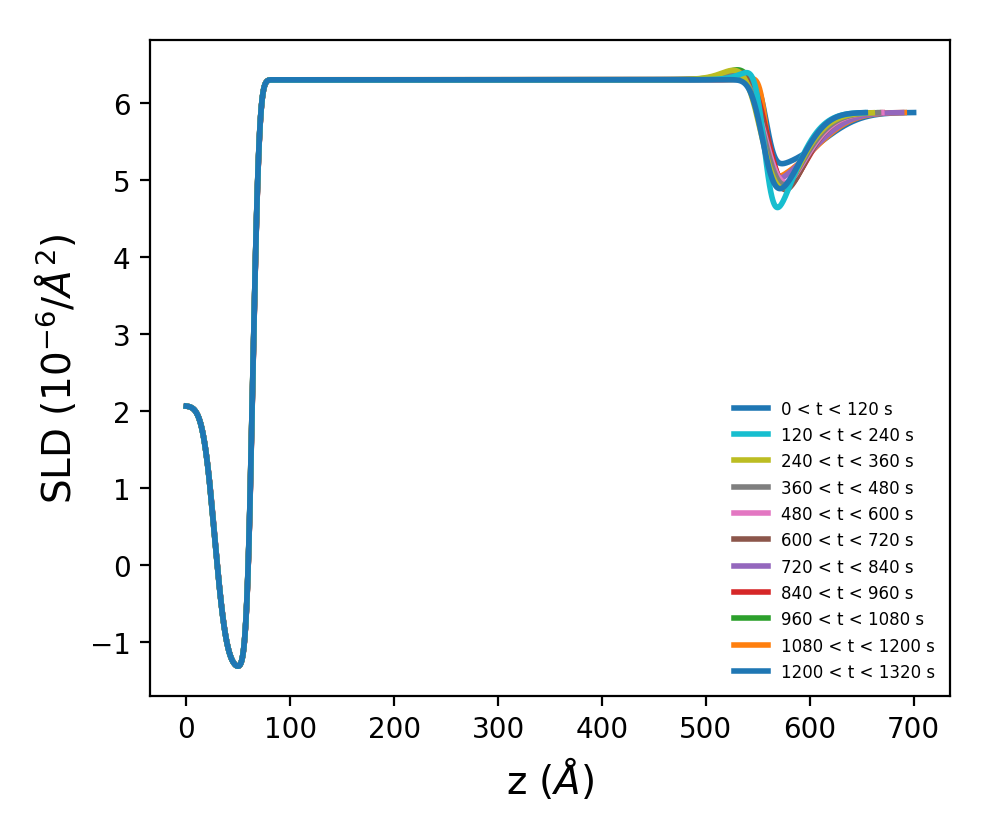

In [6]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-218389.py')



init_state = None
final_state = None

summary_plots.plot_dyn_sld(file_list, init_state, final_state, 
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=False, model_name='model-loop-218389')




Output saved to /SNS/REF_L/IPTS-34347/shared/tNR/dyn-fitting/218389-dyn/results-120s/trend-model-loop-218389.json


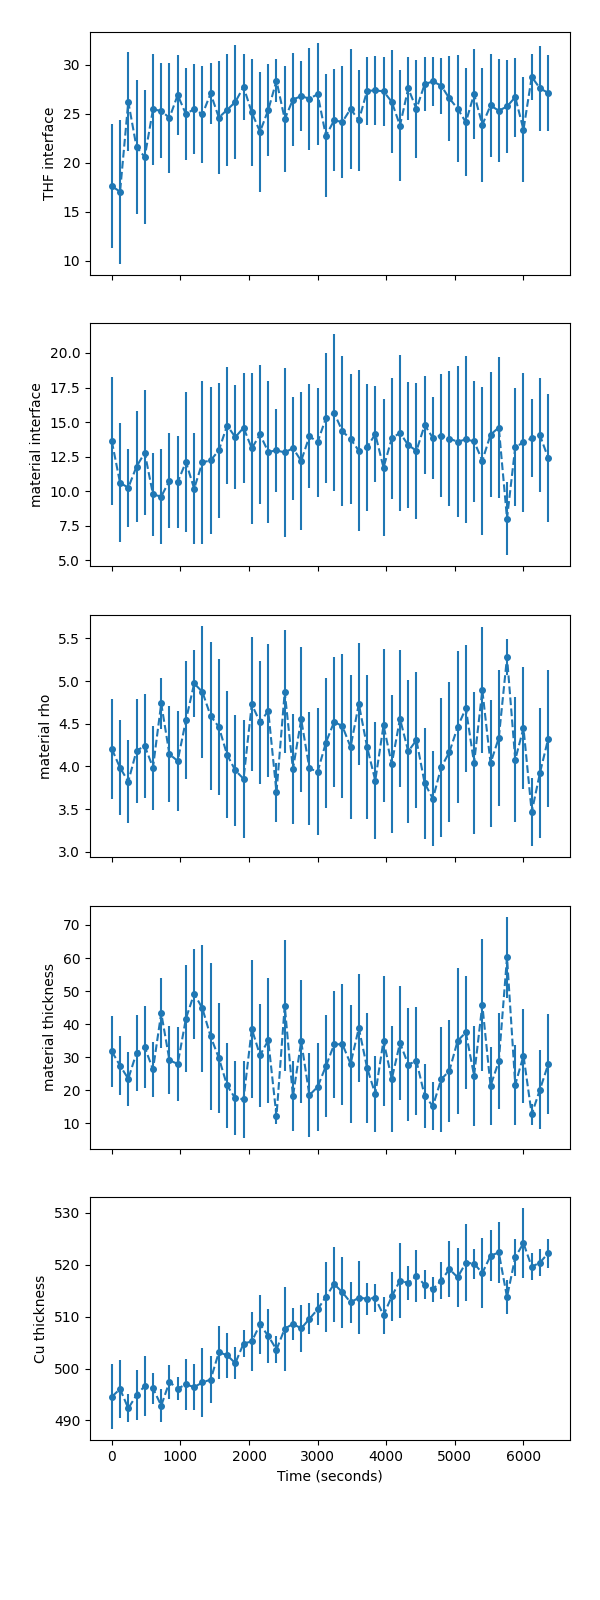

In [10]:
importlib.reload(summary_plots)

initial_state = 218386
trend_values, trend_err, timestamps = summary_plots.trend_data(file_list, initial_state, 218389, 
                                                   fit_dir=dyn_model_dir, dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-218389', model_file=None, add_plot=0, newplot=True,)
plt.show()

In [18]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207168.json')
summary_plots.write_md_table(trend_file)